In [1]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [2]:
filename='abalone.csv'
names=['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']
df=pd.read_csv(filename, names=names)
df2=df[['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight']]

In [3]:
df3=df2.fillna(value = 0)
print (df3.isnull().sum())

Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
dtype: int64


In [4]:
print(df3.shape)
print(df3.dtypes)

(4177, 7)
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
dtype: object


In [5]:
print(df3.head(5))

   Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  
0         0.150  
1         0.070  
2         0.210  
3         0.155  
4         0.055  


In [6]:
print(df3.describe())

            Length     Diameter       Height  Whole weight  Shucked weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera weight  Shell weight  
count     4177.000000   4177.000000  
mean         0.180594      0.238831  
std          0.109614      0.139203  
min          0.000500      0.001500  
25%          0.093500      0.130000  
50%          0.171000      0.234000  
75%          0.253000      0.32

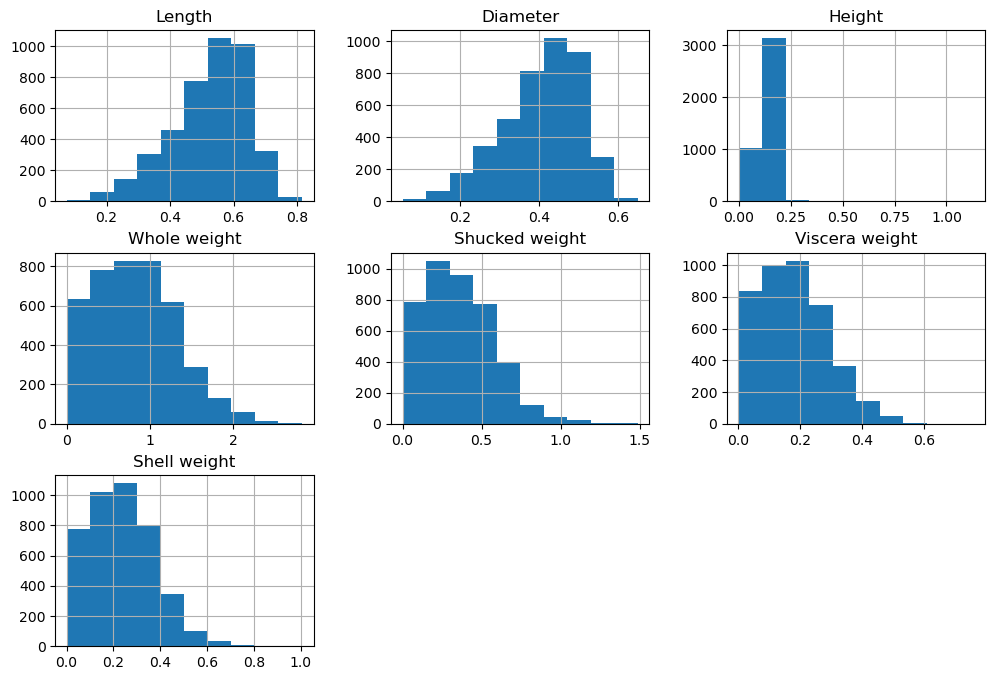

In [7]:
df3.hist(figsize=(12,8))
pyplot.show()

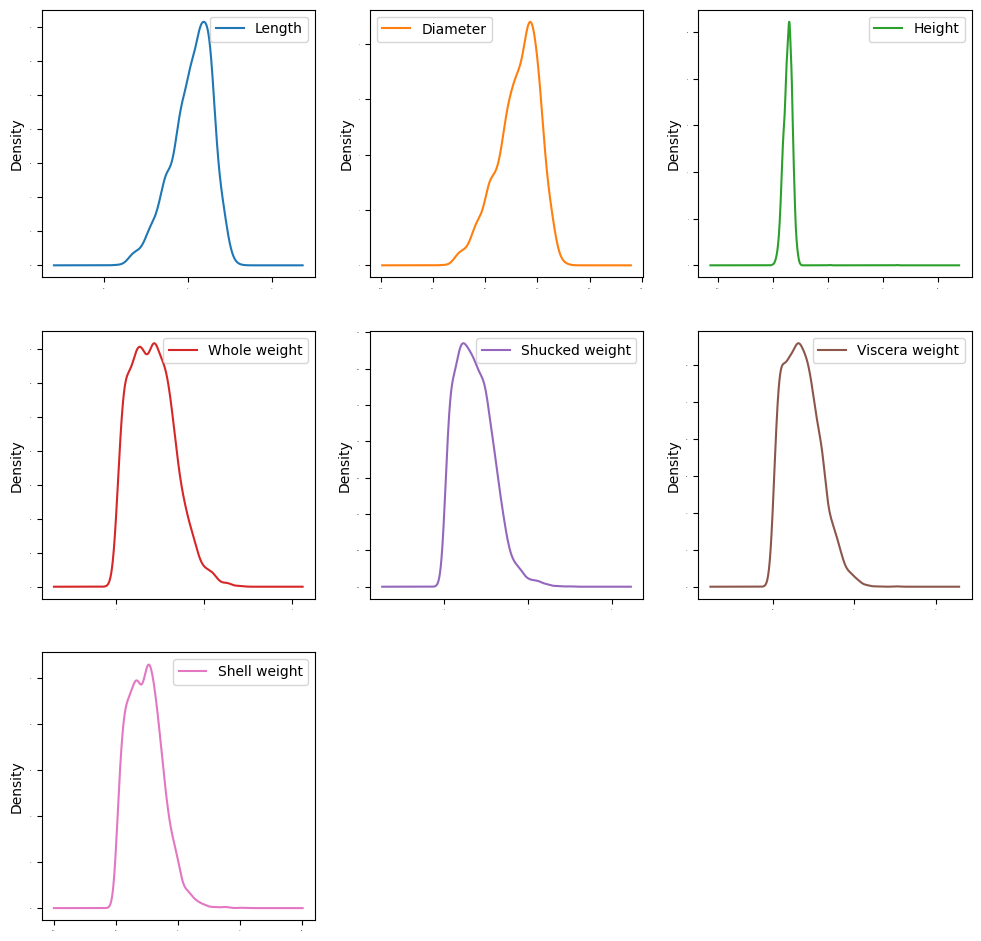

In [9]:
df3.plot(kind= 'density', subplots=True, layout=(4, 3), sharex=False, legend=True, fontsize=1, figsize=(12, 16))
pyplot.show()

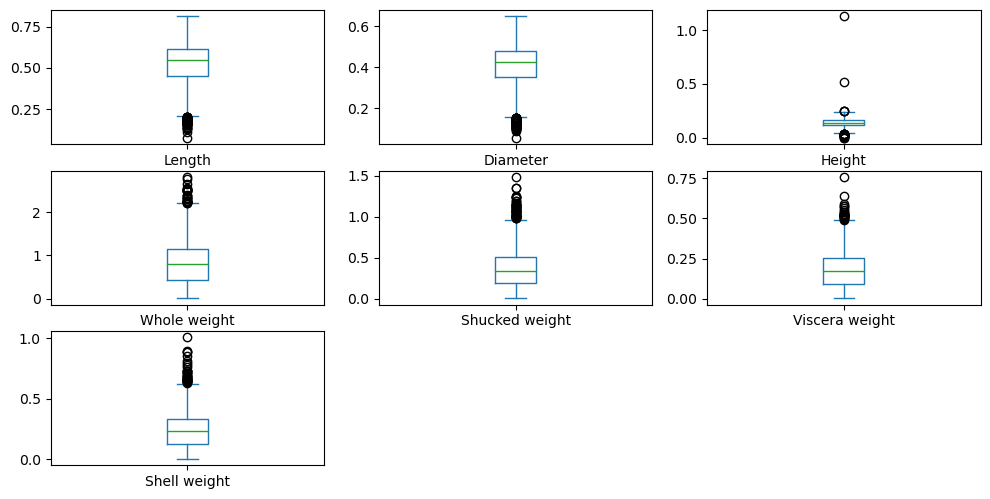

In [10]:
df3.plot(kind='box', subplots=True, layout=(4,3), sharex=False, sharey=False, figsize=(12, 8))
pyplot.show()

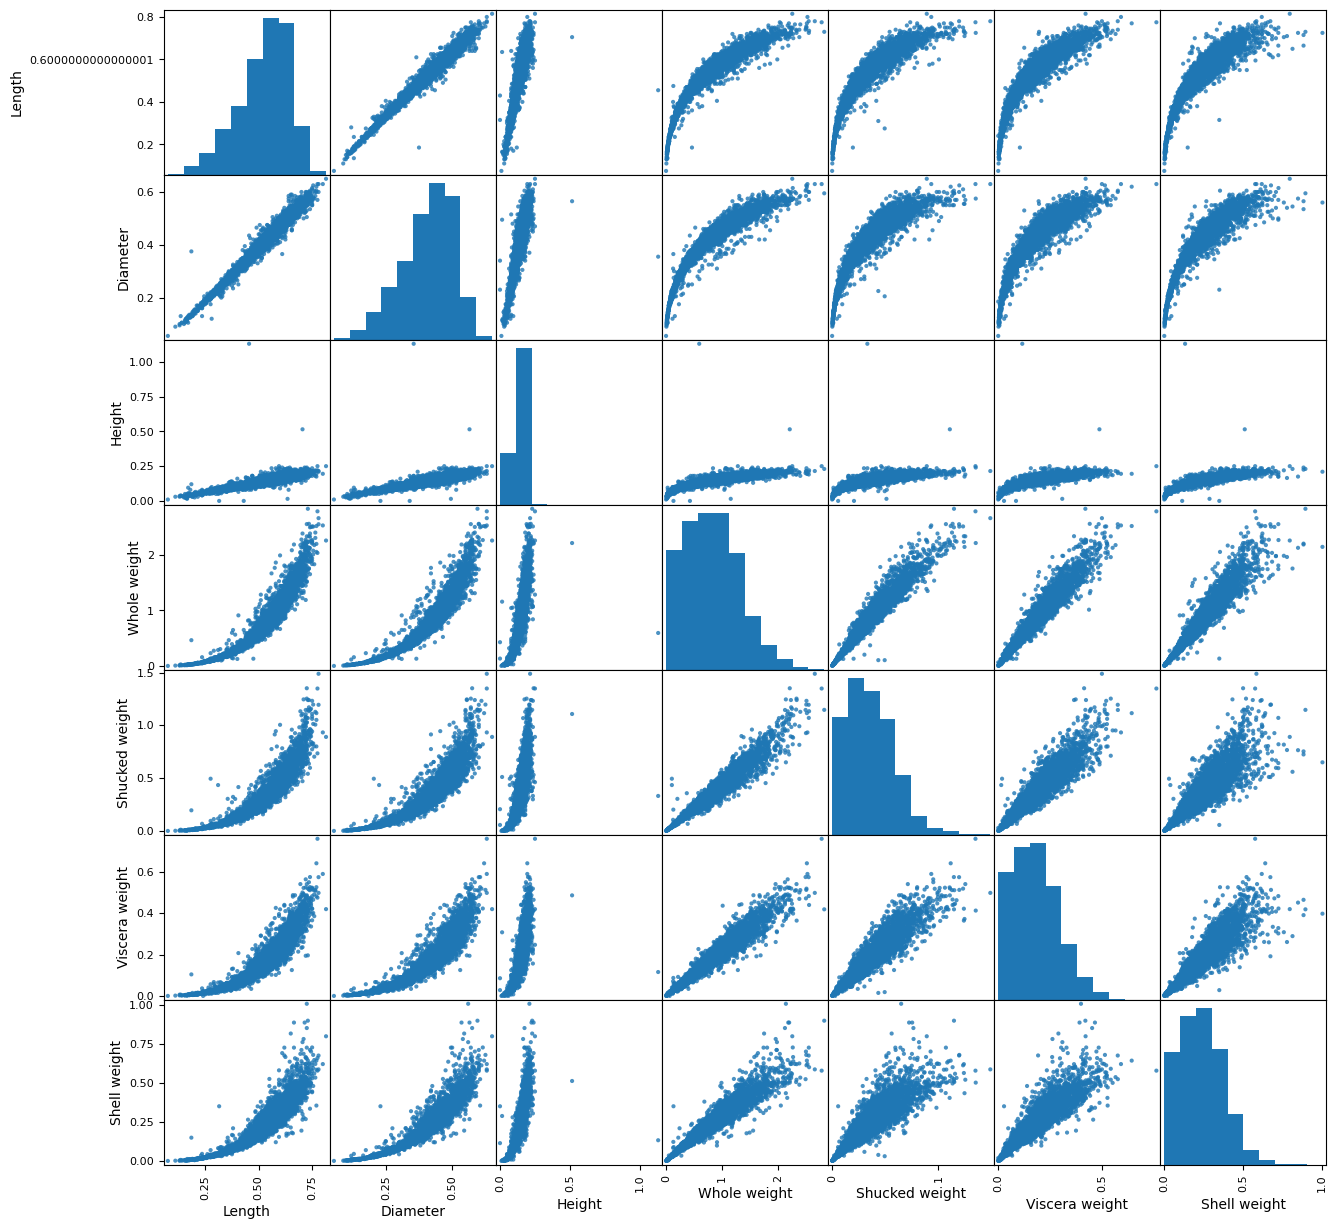

In [11]:
scatter_matrix(df3, alpha=0.8, figsize=(15, 15))
pyplot.show()

In [13]:
array=df3.values
X = array[:,0:5]
Y = array[:,5]

In [14]:
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [15]:
model= DecisionTreeRegressor()
model.fit(X_train, Y_train)

DecisionTreeRegressor()

In [16]:
Rsq = model.score (X_test, Y_test)
print (Rsq)

0.8722701313607062


In [18]:
model.predict( [[0.455, 0.095, 0.365, 0.514, 0.2245]])

array([0.1285])

In [19]:
model.predict( [[0.35, 0.09, 0.265, 0.2255, 0.0995]])

array([0.0485])

In [20]:
num_folds = 10
seed = 7
kfold = KFold (n_splits=num_folds, random_state=None)
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print (results.mean())

-0.0016119631081259393
